# Tutorial

Look at the readme before beginning for context.

Here we will make a simple linear lattice and send a particle through it

### First, let us make a simple lattice and send a particle through it.

The lattice will be a drift region (Free space), followed by an ideal lens then another drift region.

It is assumed that the lattice is point along -x because particles circluate counter clockwise in the ring. We want our lattice to point along +x so we use "initial_ang=0.0".

In [1]:
from particle_tracer_lattice import ParticleTracerLattice
L_drift=.2
L_lens=.1
Bp=1.0
rp=.01
lattice=ParticleTracerLattice(initial_ang=0.0) #make the lattice and point it along +x
#add some elements
lattice.add_drift(L_drift)
lattice.add_lens_ideal(L_lens,Bp,rp)
lattice.add_drift(L_drift)
lattice.end_lattice() #finish the lattice so the geometry can be solved

If you are unsure about how a function works you can navigate to it in the code to read about it. In PyCharm or DataSpell this is as easy as placing yur cursor on the function and clicking command-b or control-b. Or you can use the help function, shown below, to read the documentation.

In [2]:
help(lattice.add_lens_ideal)  #I use the function in question ,without arguments, as an argument to help.

Help on method add_lens_ideal in module particle_tracer_lattice:

add_lens_ideal(L: Union[int, float], Bp: Union[int, float], rp: Union[int, float], constrain: bool = False, ap: Union[int, float] = None) -> None method of particle_tracer_lattice.ParticleTracerLattice instance
    Add to the lattice an ideal magnetic hexapole lens. Field norm goes as B0=Bp*r^2/rp^2
    
    :param L: Hard edge length of element, m.
    :param Bp: Field at bore face of lens,T.
    :param rp: Bore/pole radius of lens, m.
    :param ap: Aperture of lens, possibly a limit set by a vacuum tube, m.
    :param constrain: To use the element as a constraint, under construction
    :return: None



Let's look at our lattice. This is a projection into the xy cartesian lab frame

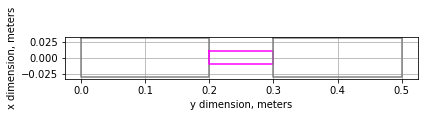

In [3]:
lattice.show() #the real aspect ratio

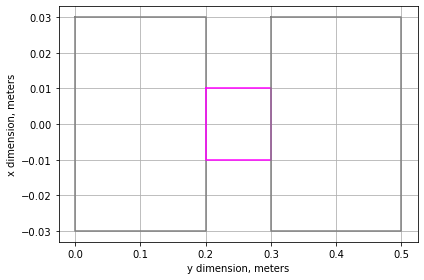

In [4]:
#sometimes the real aspect ratio is hard to use cause the lattice might be really long
lattice.show(true_aspect_ratio=False)

Let's now prepare to trace a particle through the lattice. To do this we make a ParticleTracer and a Particle to trace

In [5]:
from particle_tracer import ParticleTracer
from particle import Particle
import numpy as np
pt=ParticleTracer(lattice)
#initial positions in phase space
q_initial=(0.0,1e-3,0.0)
p_initial=(210,-5.0,0)
particle=Particle(qi=q_initial,pi=p_initial)

now trace the particle. It can only be traced once! The first time we trace it, it will take longer because of the library Numba compiling functions. By default particle phase space coordinates and energies are logged

In [17]:
h=1e-5 #time step size, s.
T=1.0 #max simulation time
particle=pt.trace(particle,h,T)

Exception: Particle has previously been traced. Tracing a second time is not supported

Now let's plot the particle in the lattice

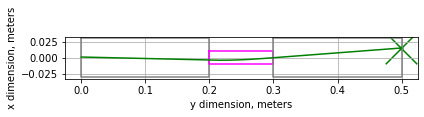

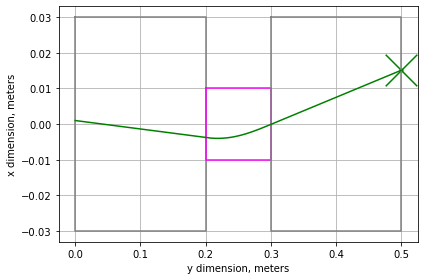

In [18]:
lattice.show(particle=particle)
lattice.show(particle=particle,true_aspect_ratio=False)

Plot the particle coordinates relative to the "Design Orbit". This is a concept in accelerator physics. Briefly, the design orbit is an orbit that the ideal particle would travel, in this case a particle starting at the origin and traveling along +x. We have been using cartesian coordinates so far (x,y,z), but the design orbit uses curvilinear coordinates (z or s, x, y). This can create some confusion

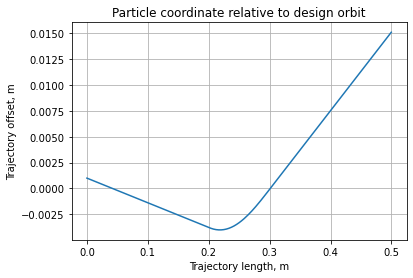

In [19]:
#Convenience function for plotting coordinates against 's' (distance along design orbit)
#can plot orbit coords x,y,ps,px,py.
particle.plot_orbit_coordinate('x') #Same as y cartesian coordinate in this case

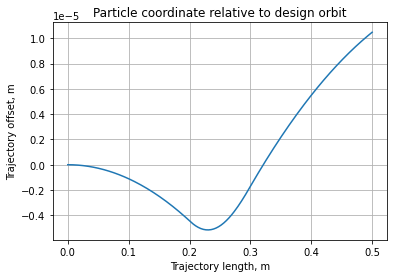

In [20]:
particle.plot_orbit_coordinate('y') #Plot the y orbit dimension (here the z cartesian). Notice the effect of gravity

Let's plot the energies also

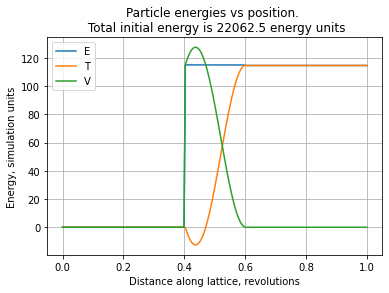

In [27]:
#terrible energy conservation because the ideal lens does not respect maxwells equation except transversly
particle.plot_energies()

We can access the logged coordinates of the particle. Coordinates are logged by particles when that

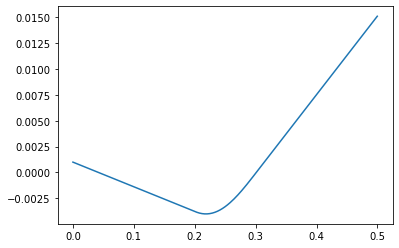

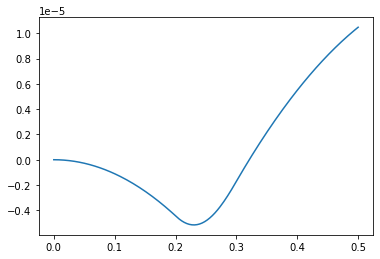

In [23]:
#cartesian position coordinates
import matplotlib.pyplot as plt
x,y,z=particle.q_vals.T #transposing a (N,3) array is an easy way to unpack the 3 columns into 3 variables
plt.plot(x,y)
plt.show()
plt.plot(x,z)
plt.show()

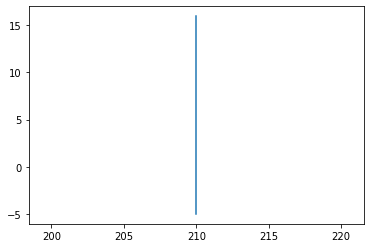

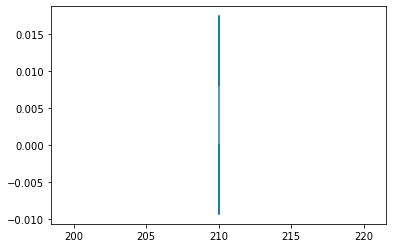

In [25]:
#cartesian momentum coordinates. No slowing in x, so a straight line!
px,py,pz=particle.p_vals.T
plt.plot(px,py)
plt.show()
plt.plot(px,pz)
plt.show()

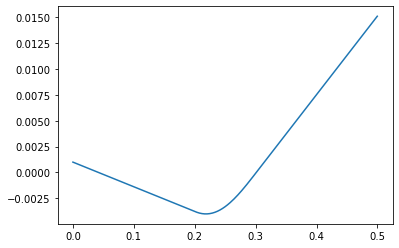

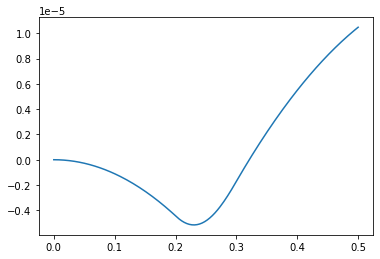

In [24]:
#orbit position coordinates
s,x,y=particle.qo_vals.T
plt.plot(s,x)
plt.show()
plt.plot(s,y)
plt.show()

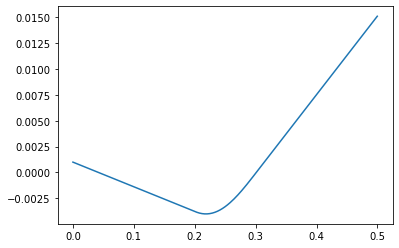

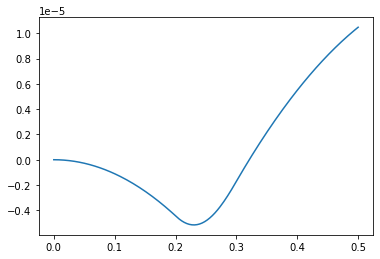

In [26]:
#orbit momentum coordinates
ps,px,py=particle.po_vals.T
plt.plot(ps,px)
plt.show()
plt.plot(ps,py)
plt.show()

## Part 2

Instead of a single particle, we will use a swarm of particle. We will also consider how to examine slices through the lattice in phase space, also known as Poincare maps. First we make a SwarmTracer to make and then trace Swarm

In [1]:
from swarm_tracer import SwarmTracer
h=1e-5 #time step size, s.
T=1.0 #max simulation time
st=SwarmTracer(lattice)
swarm_initial=st.pseudorandom_swarm(q_trans_bounds=1e-3,p_trans_bounds=10.0,num_particles=100) #make a random swarm in phase space
swarm_traced=st.trace_swarm_through_lattice(swarm_initial,h,T,use_fast_mode=False)

NameError: name 'lattice' is not defined

Now let's make a poincare map inside the lens. You can do alot of analysis with this

In [ ]:
from analysis.phaseSpaceAnalyzer import SwarmPoincare
import matplotlib.pyplot as plt
x_lens_middle=L_drift+L_lens/2
swarm_slice=SwarmPoincare(swarm_traced,x_lens_middle)

#simple scatter plot of locations inside the lens
x_plot,y_plot=[],[]
for particle in swarm_slice:
    x_plot.append(particle.q[1])
    y_plot.append(particle.q[2])
plt.scatter(x_plot,y_plot)
plt.show()